# Parkinson's Disease Classification

Presented by: Shweta Jha(20BCSE11) and Rajat Kumar(20BCSE58)

In [257]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

In [258]:
df=pd.read_csv("parkinsons.csv")

In [259]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [260]:
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,0.01026,0.01161,0.01373,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [261]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [263]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# Selecting Target Variable

In [264]:
#here status is our target value predicting is person has Parkinson or not

df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

<AxesSubplot:xlabel='status', ylabel='count'>

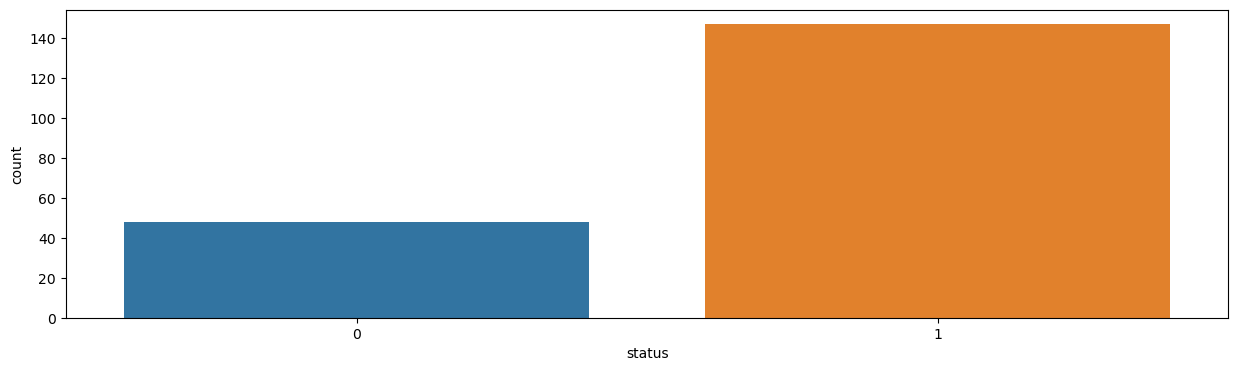

In [265]:
import seaborn as sns
sns.countplot(df['status'])

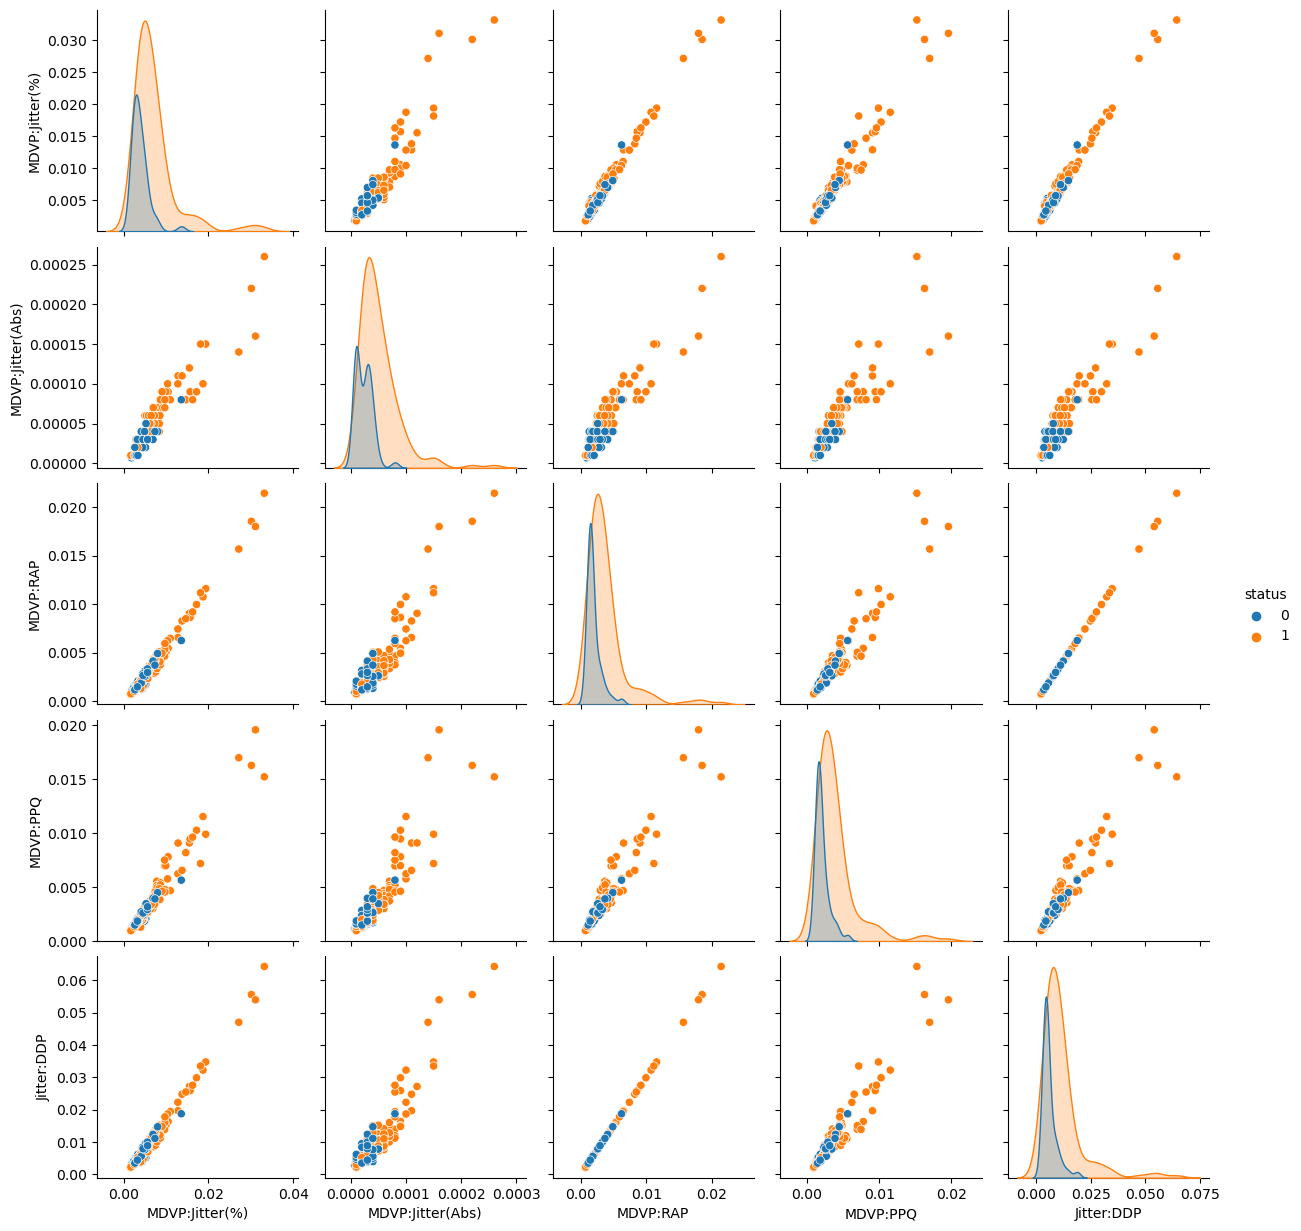

In [266]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'status', vars = ['MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ', 'Jitter:DDP'] )
plt.show()

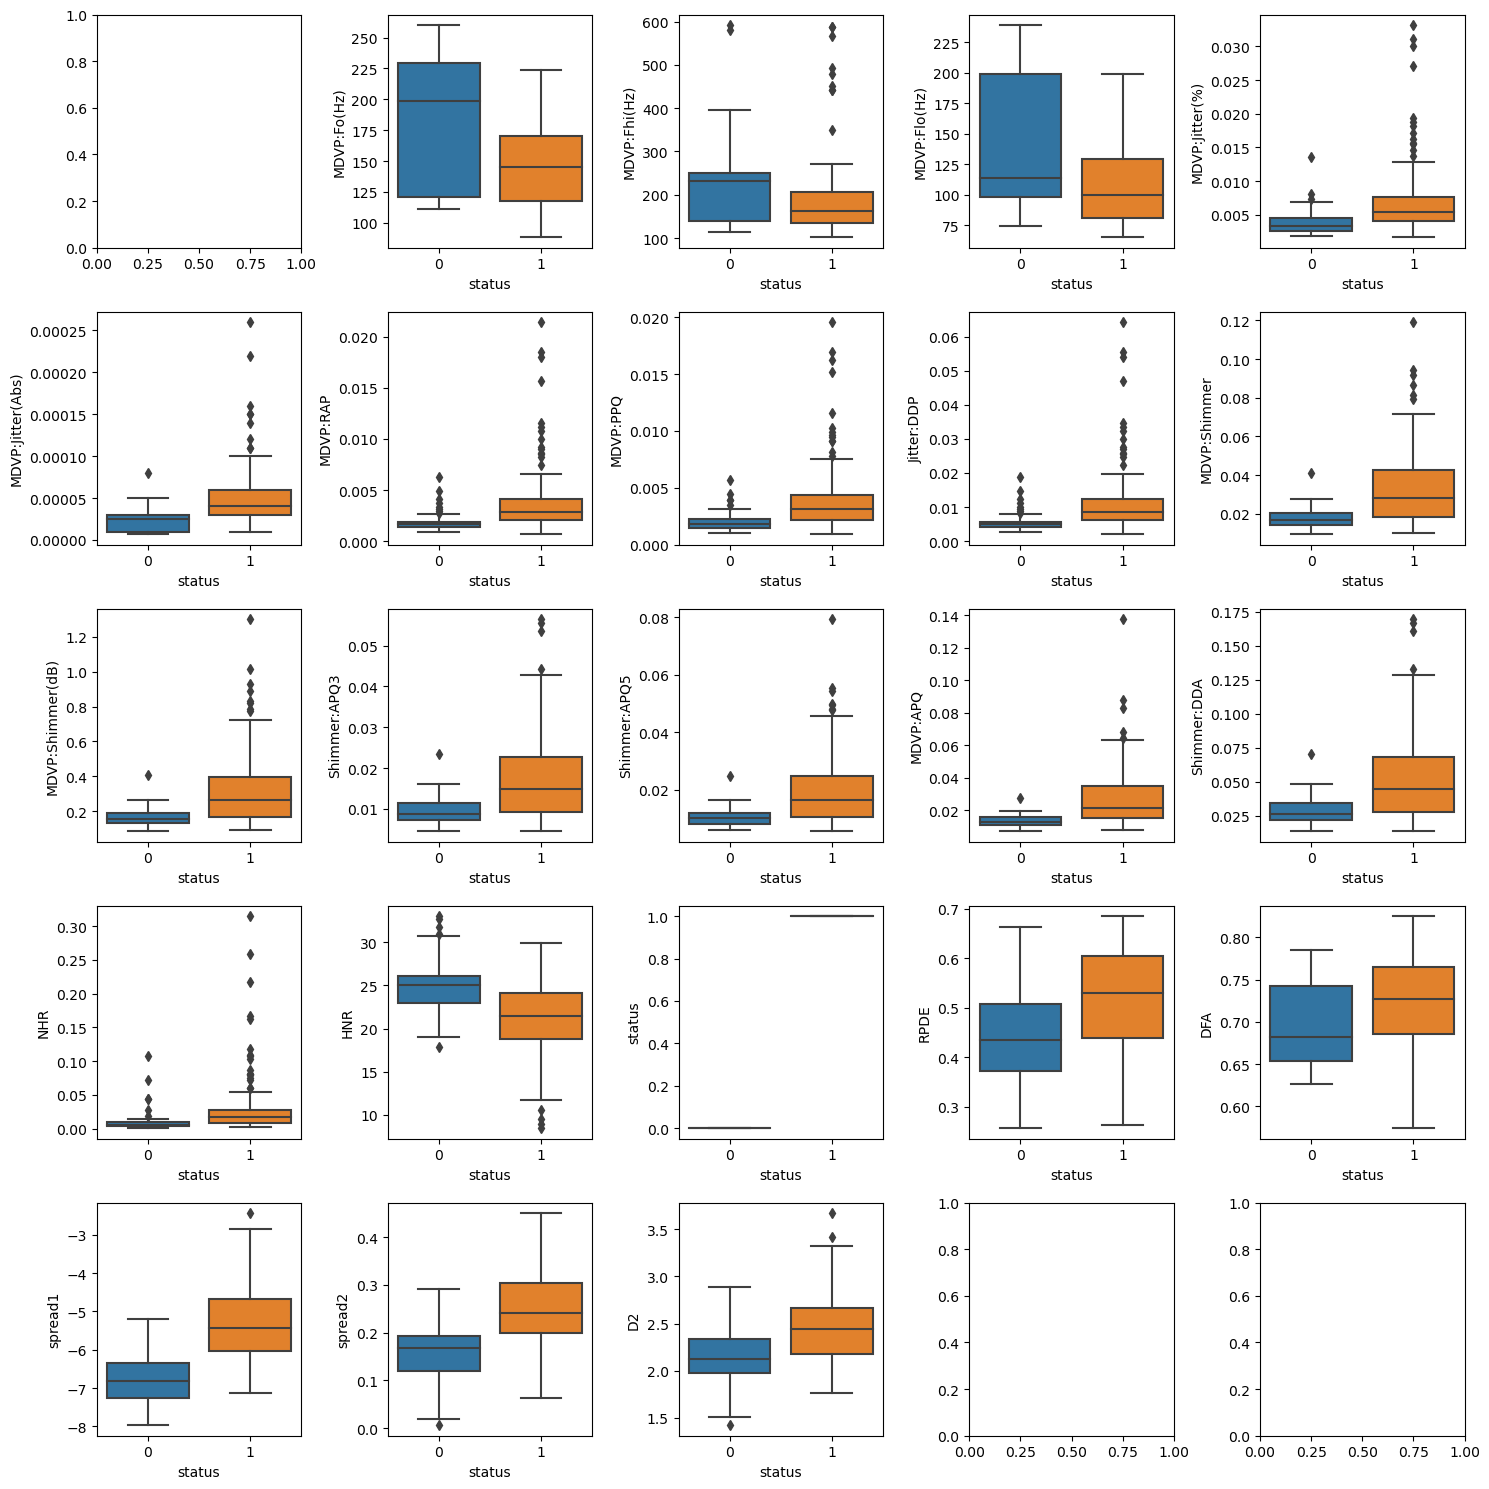

In [267]:
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(df.columns)-1):
    sns.boxplot(x='status',y=df.iloc[:,i],data=df,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()

<AxesSubplot:>

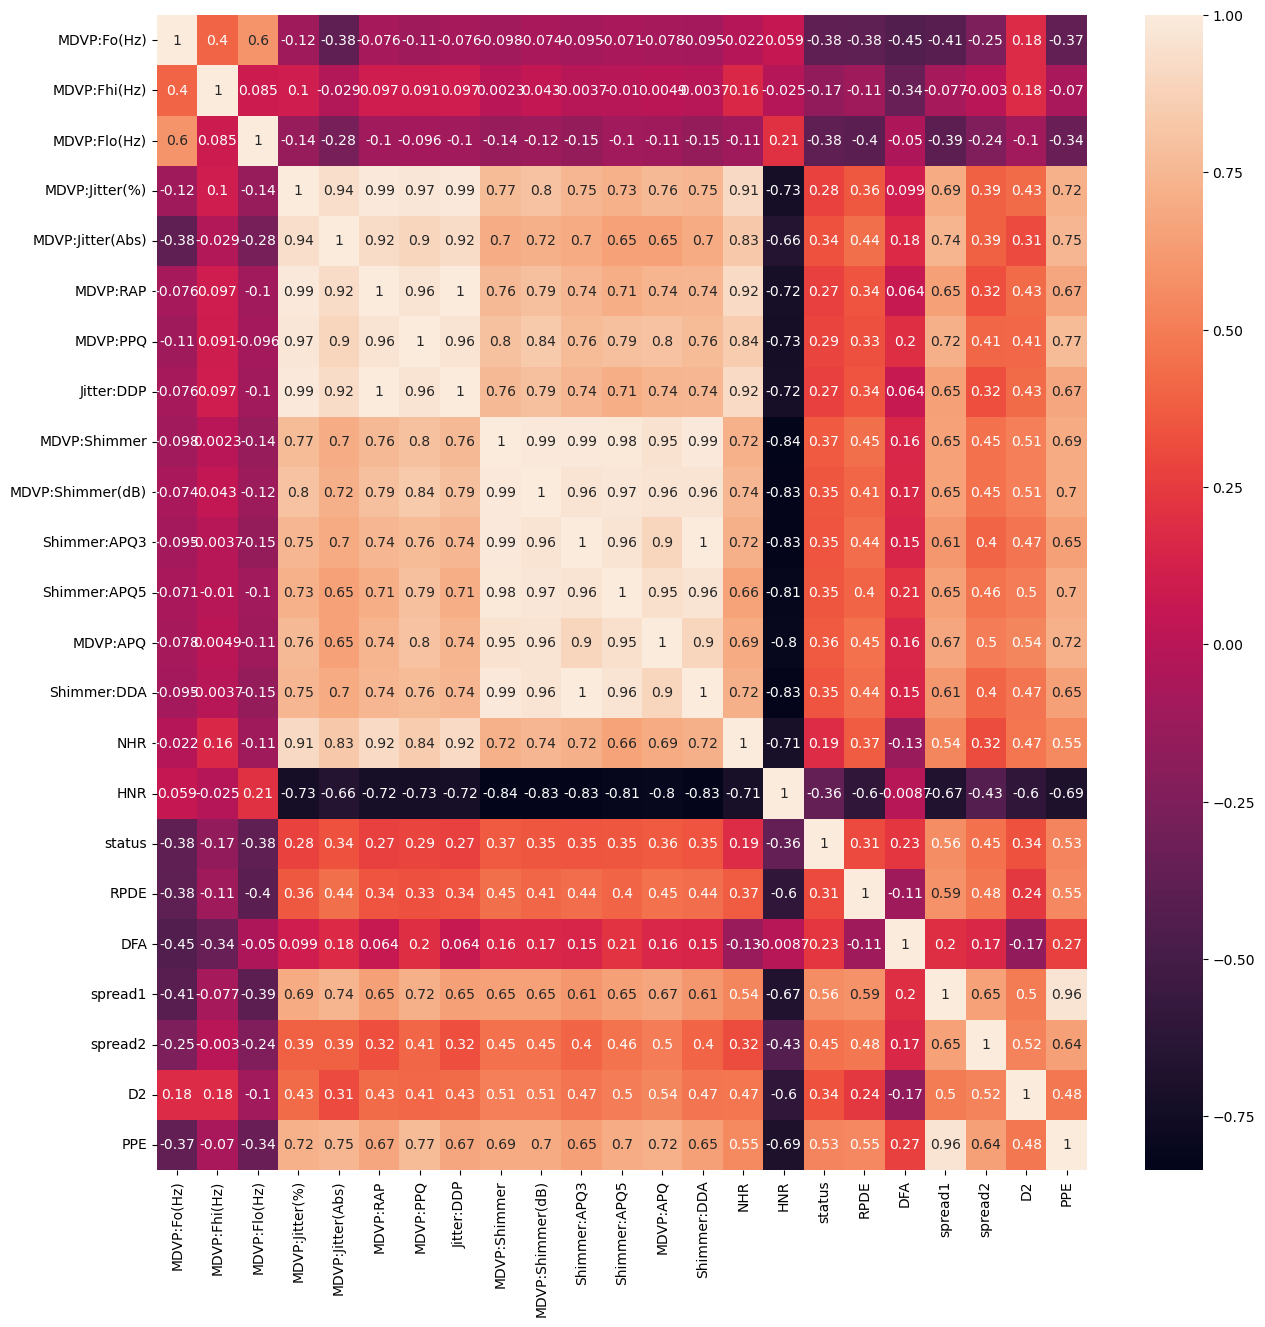

In [268]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(df.corr(),annot=True,ax=ax)

In [269]:
#grouping data based on target variable

df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [270]:
#Now we seperate our features and target variable. Our target variable is 'Status'

x=df.drop(columns=['name','status'],axis=1)
y=df['status']

In [271]:
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.2,random_state=2)


# Data Standardization

In [272]:
standardized=StandardScaler()

In [273]:
standardized.fit(X_train)

StandardScaler()

In [274]:
X_train=standardized.transform(X_train)
X_test=standardized.transform(X_test)

In [275]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


In [276]:
#print(X_test)

In [277]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))
X_features = scaler.fit_transform(x)
Y_labels = y
X_train , X_test , Y_train , Y_test = train_test_split(X_features, Y_labels , test_size=0.20, random_state=20)

# Training model using SVM Classification

Using Linear Kernel

In [278]:
model=svm.SVC(kernel='linear')

In [279]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [280]:
X_train_prediction=model.predict(X_train)
train_data_accuracy=accuracy_score(Y_train,X_train_prediction)

In [281]:
print("Accuracy : ",train_data_accuracy)

Accuracy :  0.9102564102564102


In [282]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)

In [283]:
print("Accuracy : ",test_data_accuracy)

Accuracy :  0.8717948717948718


<AxesSubplot:>

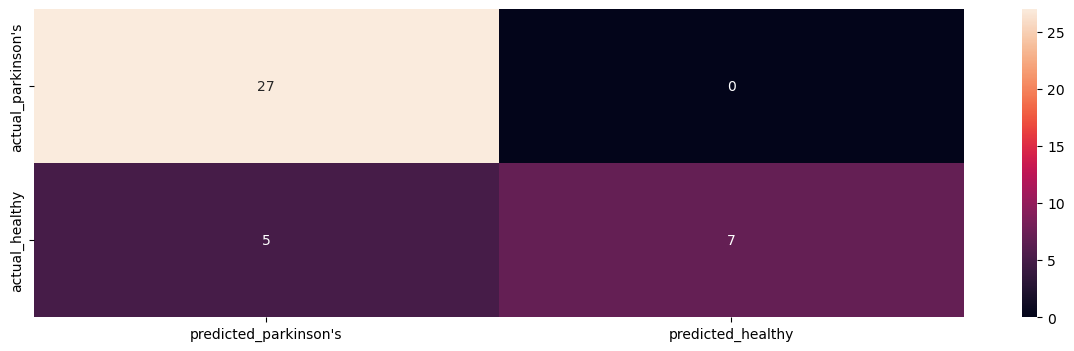

In [284]:
from sklearn.metrics import classification_report, confusion_matrix
cm=np.array(confusion_matrix(Y_test,X_test_prediction,labels=[1,0]))
confusion=pd.DataFrame(cm,index=["actual_parkinson's","actual_healthy"],columns=["predicted_parkinson's","predicted_healthy"])
sns.heatmap(confusion,annot=True)

# SVM RBF Kernel

In [285]:
def svm_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001, 0.4, 0.2, 0.8],'kernel': ['rbf']}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    svm = SVC()
    
    #use gridsearch to test all values
    svm_gscv = RandomizedSearchCV(estimator = svm,
                           param_distributions = param_grid,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
    #fit model to data
    svm_gscv.fit(X, y)
    
    return svm_gscv.best_params_

In [286]:
svm_grid_search(X_train, Y_train)

{'kernel': 'rbf', 'gamma': 0.8, 'C': 100}

In [287]:
from sklearn import svm
svm = SVC(gamma=1, C=100, kernel='rbf', probability=True)

svm.fit(X_train, Y_train)

y_pred = svm.predict(X_test)

print(svm.score(X_train, Y_train))
print(svm.score(X_test, Y_test))

print(metrics.classification_report(Y_test, y_pred))

1.0
0.9743589743589743
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.96      1.00      0.98        27

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39



<AxesSubplot:>

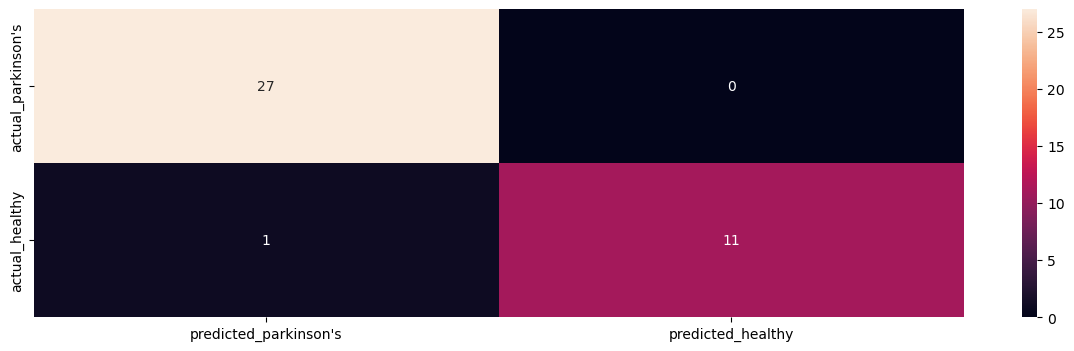

In [288]:
cm=np.array(confusion_matrix(Y_test,y_pred,labels=[1,0]))
confusion=pd.DataFrame(cm,index=["actual_parkinson's","actual_healthy"],columns=["predicted_parkinson's","predicted_healthy"])
sns.heatmap(confusion,annot=True)

# KNN Classification

In [289]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [290]:
Y_prediction=classifier.predict(X_test)

In [291]:
print(classification_report(Y_test,Y_prediction))
print(confusion_matrix(Y_test,Y_prediction))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.93      0.96      0.95        27

    accuracy                           0.92        39
   macro avg       0.92      0.90      0.91        39
weighted avg       0.92      0.92      0.92        39

[[10  2]
 [ 1 26]]


<AxesSubplot:>

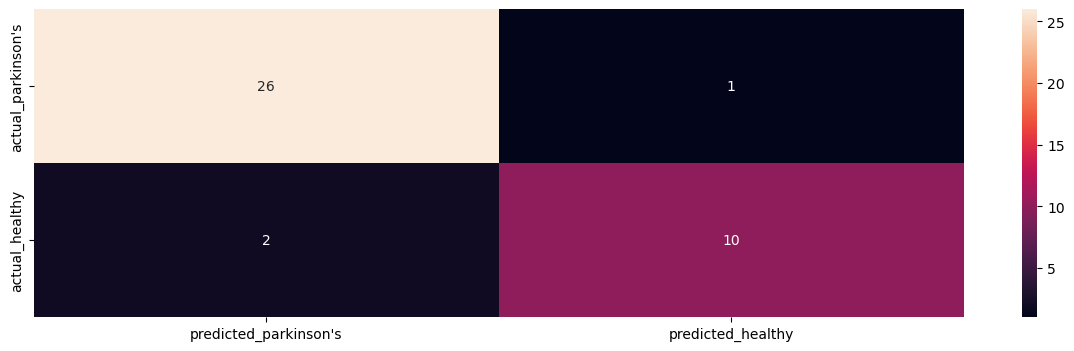

In [292]:
cm=np.array(confusion_matrix(Y_test,Y_prediction,labels=[1,0]))
confusion=pd.DataFrame(cm,index=["actual_parkinson's","actual_healthy"],columns=["predicted_parkinson's","predicted_healthy"])
sns.heatmap(confusion,annot=True)

In [293]:
test_data_accuracy=accuracy_score(Y_test,Y_prediction)
print("Accuracy : ",test_data_accuracy)

Accuracy :  0.9230769230769231


# Naive Bayes Classification 

In [294]:
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train,Y_train)


GaussianNB()

In [295]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, Y_test)
f1 = f1_score(y_pred, Y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.6410256410256411
F1 Score: 0.6324786324786325


<AxesSubplot:>

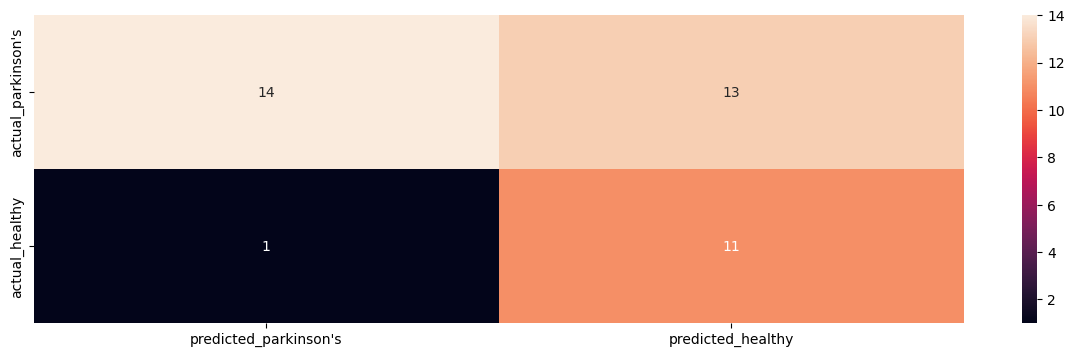

In [296]:
cm=np.array(confusion_matrix(Y_test,y_pred,labels=[1,0]))
confusion=pd.DataFrame(cm,index=["actual_parkinson's","actual_healthy"],columns=["predicted_parkinson's","predicted_healthy"])
sns.heatmap(confusion,annot=True)

# Logistic Regression

In [297]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)

In [298]:
accuray = accuracy_score(y_pred, Y_test)
f1 = f1_score(y_pred, Y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8461538461538461
F1 Score: 0.8562334217506631


<AxesSubplot:>

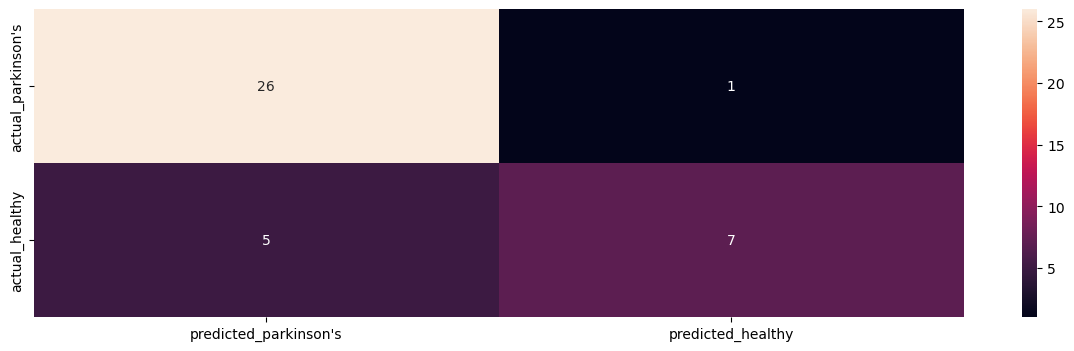

In [299]:
cm=np.array(confusion_matrix(Y_test,y_pred,labels=[1,0]))
confusion=pd.DataFrame(cm,index=["actual_parkinson's","actual_healthy"],columns=["predicted_parkinson's","predicted_healthy"])
sns.heatmap(confusion,annot=True)

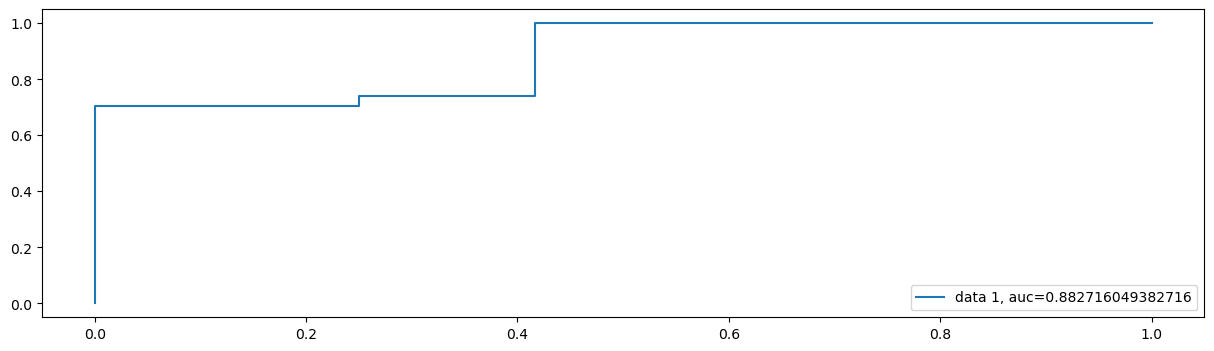

In [300]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Random Forest Classification

In [301]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image

In [302]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [303]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(y_pred, Y_test, average="weighted")
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.8717948717948718
F1 Score: 0.8775785617890881


<AxesSubplot:>

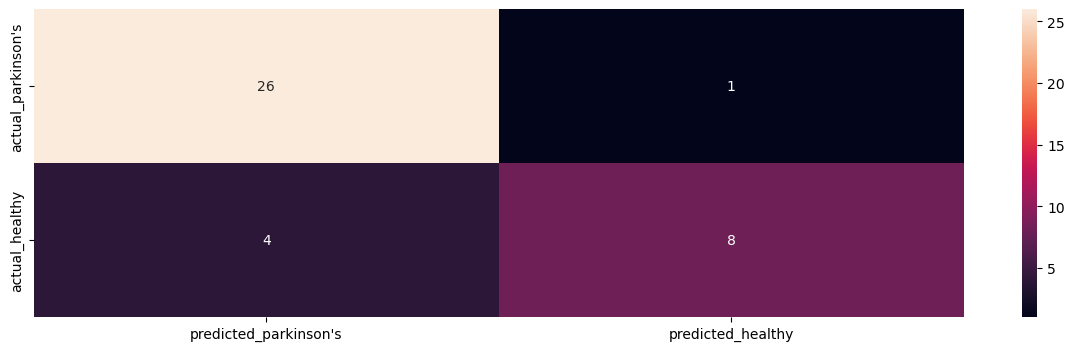

In [304]:
cm=np.array(confusion_matrix(Y_test,y_pred,labels=[1,0]))
confusion=pd.DataFrame(cm,index=["actual_parkinson's","actual_healthy"],columns=["predicted_parkinson's","predicted_healthy"])
sns.heatmap(confusion,annot=True)

# AdaBoosting

In [305]:
from sklearn.ensemble import AdaBoostClassifier

In [306]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
model = abc.fit(X_train, Y_train)
y_pred = model.predict(X_test)


In [307]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


Accuracy: 0.8461538461538461


# Using different Base Estimators

In [308]:
from sklearn.svm import SVC
svc=SVC(probability=True, kernel='linear')
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

model = abc.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.6923076923076923


In [309]:
def ada_grid_search(X, y):
    param_grid = {'n_estimators':[10, 50, 100, 500], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    ada = AdaBoostClassifier()
    ada_gscv = GridSearchCV(ada, param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
    grid_result = ada_gscv.fit(X, y)
    
    return ada_gscv.best_params_

In [310]:
ada_grid_search(X_train, Y_train)

{'learning_rate': 0.1, 'n_estimators': 500}

In [311]:
abcl = AdaBoostClassifier(n_estimators=500, learning_rate = 0.1)
abcl = abcl.fit(X_train, Y_train)

y_pred = abcl.predict(X_test)

print(abcl.score(X_train, Y_train))
print(abcl.score(X_test,Y_test))

print(metrics.classification_report(Y_test, y_pred))

1.0
0.8974358974358975
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.90      0.96      0.93        27

    accuracy                           0.90        39
   macro avg       0.90      0.86      0.87        39
weighted avg       0.90      0.90      0.89        39



<AxesSubplot:>

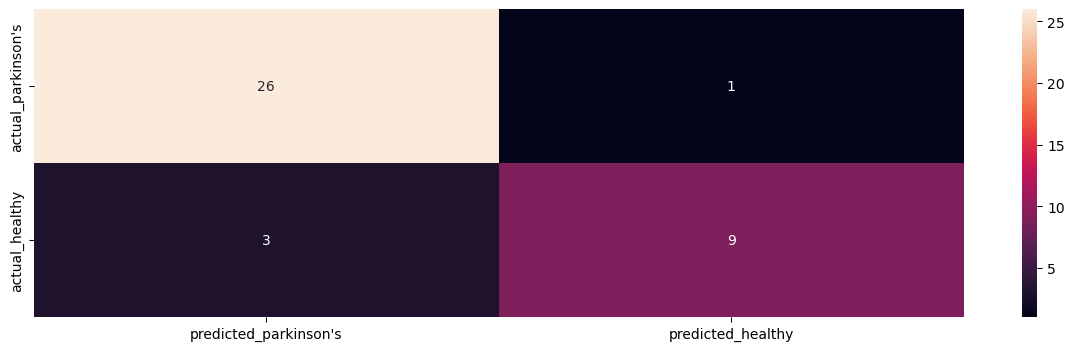

In [312]:
cm=np.array(confusion_matrix(Y_test,y_pred,labels=[1,0]))
confusion=pd.DataFrame(cm,index=["actual_parkinson's","actual_healthy"],columns=["predicted_parkinson's","predicted_healthy"])
sns.heatmap(confusion,annot=True)

# Comparing the different models

<AxesSubplot:title={'center':'Model Accuracy Histogram'}, xlabel='Model Names', ylabel='Accuracy'>

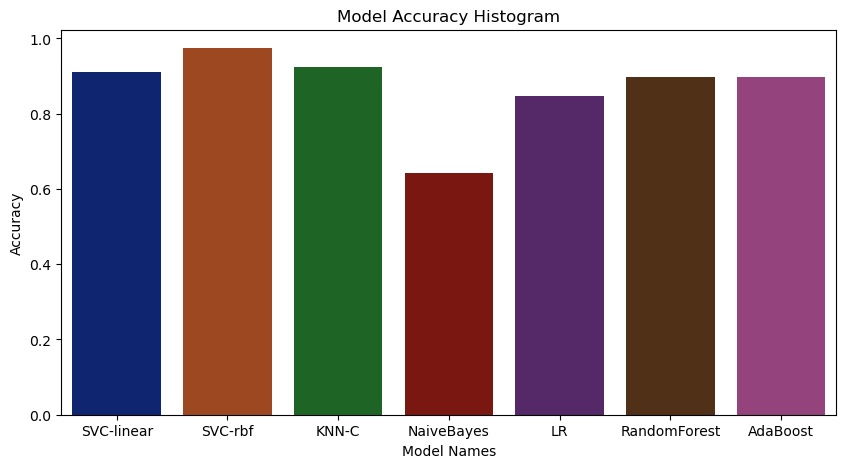

In [313]:
import matplotlib.pyplot as plt
import seaborn as sns
results = [0.9102564102564102, 0.9743589743589743, 0.9230769230769231, 0.6410256410256411, 0.8461538461538461, 0.8974358974358975, 0.8974358974358975]
names = ['SVC-linear', 'SVC-rbf', 'KNN-C', 'NaiveBayes', 'LR', 'RandomForest', 'AdaBoost']

plt.figure(figsize=[10,5],dpi=100)

plt.xlabel('Model Names')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Histogram')
sns.barplot(x=names,y=results,palette='dark')


Hence we conclude that SVM CLassification with Radial Basis Function Kernel gives us the best result.